Processing 2011
Processing 2012
Processing 2013


C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Processing 2014
Processing 2015


C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Processing 2016
Processing 2017
Processing 2018


C:\Users\alexa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Processing 2019
Processing 2020

Languages appearing in all surveys: 

C 10
C# 10
C++ 10
Java 10
JavaScript 10
PHP 10
Python 10
Ruby 10
SQL 10

Languages appearing in 4-9 surveys: 

Objective-C 9
Perl 7
Go 6
Rust 6
Scala 6
Swift 6
R 6
Clojure 5
Dart 5
Haskell 5
F# 5
Matlab 4
Assembly 4
VBA 4
Node.js 4
TypeScript 4
CoffeeScript 4


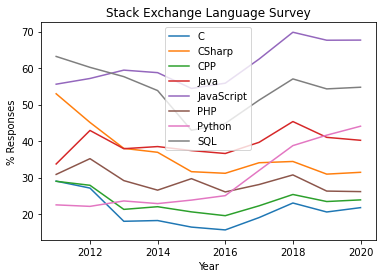

In [1]:
import requests
import zipfile
import shutil
import os
import pandas as pd
import json
import matplotlib.pyplot as plt


urls = {
    2020: "https://drive.google.com/uc?export=download&id=1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB",
    2019: "https://drive.google.com/uc?export=download&id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV",
    2018: "https://drive.google.com/uc?export=download&id=1_9On2-nsBQIw3JiY43sWbrF8EjrqrR4U",
    2017: 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM',
    2016: 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrV0VldnVIT1hyb0E',
    2015: 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsra1psanV1MEdxZk0',
    2014: 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrempjMktvWFNaQzA',
    2013: 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrenpPNTc5UE1PYW8',
    2012: 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrX3JaZWVwWEpHNWM',
    2011: 'https://drive.google.com/uc?export=download&id=0Bx0LyhBTBZQgUGVYaGx3SzdUQ1U'
}

filenames = {
    2020: 'survey_results_public.csv', 
    2019: 'survey_results_public.csv', 
    2018: 'survey_results_public.csv', 
    2017: 'survey_results_public.csv', 
    2016: '2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv',
    2015: '2015 Stack Overflow Developer Survey Responses.csv',
    2014: '2014 Stack Overflow Survey Responses.csv',
    2013: '2013 Stack Overflow Survey Responses.csv',
    2012: '2012 Stack Overflow Survey Results.csv',
    2011: '2011 Stack Overflow Survey Results.csv'
}

question_names = {
    2020: 'LanguageWorkedWith',
    2019: 'LanguageWorkedWith',
    2018: 'LanguageWorkedWith',
    2017: 'HaveWorkedLanguage',
    2016: 'tech_do',
    2015: 'Select all that apply',
    2014: 'Which of the following languages or technologies have you used significantly in the past year?',
    2013: 'Which of the following languages or technologies have you used significantly in the past year?',
    2012: 'Which languages are you proficient in?',
    2011: 'Which languages are you proficient in?',
}

def survey_csvname(year):
    return 'survey{}.csv'.format(year)

def download_survey(year):
    print(f"Downloading {year}")
    request = requests.get(urls[year])
    with open("survey.zip", "wb") as file:
        file.write(request.content) 

    with zipfile.ZipFile("survey.zip", "r") as file:
        file.extractall("data")

    shutil.move("data/" + filenames[year], survey_csvname(year))
    shutil.rmtree("data", ignore_errors=True)
    os.remove("survey.zip")

def languages_breakdown(year):
    if not os.path.exists(survey_csvname(year)):
        download_survey(year)

    print(f"Processing {year}")
    data=pd.read_csv(survey_csvname(year), encoding='latin1')

    if year >= 2016:
        # Languages are semicolon separated list in a single column
        languages = data[question_names[year]].str.split(';', expand=True)
    else:
        # Languages are a set of columns, one column per language + other
        # First get a list of column names that represent the set of languages/technology
        current = 0
        columnNames = []

        # Iterate through columns until we get to the language/tech question       
        while data.columns[current] != question_names[year]:
            current += 1

        # Add all columns except for other (which is the last one)
        while data.columns[current + 1].startswith('Unnamed'):
            columnNames.append(data.columns[current])
            current += 1

        # Filter the survey to just the language column names
        languages = data[columnNames]
        languages = languages.drop(0)

    summary = languages.apply(pd.Series.value_counts)
    summary = pd.DataFrame({'count': summary.sum(axis=1).groupby(lambda x: x.strip()).sum()})

    total = data[data[question_names[year]].notnull()].shape[0]
    if year < 2016:
        notNull = languages.apply(lambda x: pd.notnull(x)).sum(axis=1)
        total = notNull[notNull > 0].shape[0]
    summary['percent'] = summary['count']/total*100

    return summary

if __name__ == "__main__":
    # Process CSV files by year and save results to totals dictionary
    totals = {}
    for year in range(2011, 2021):
        totals[year] = languages_breakdown(year).to_dict()

    # Save totals as json for other applications
    with open('data.json', 'w') as file:
        file.write(json.dumps(totals, indent=4, separators=(',', ': ')))

    # Build list of survey years
    Years = list(totals.keys())

    # Calculate frequency of language appearance
    Keylist = []
    for key in Years:
        LanguageKeys = list(totals[key]['count'].keys())
        for Key in LanguageKeys:
            Keylist.append(Key)
    Unique_Languages = set(Keylist)
    Frequency = {}
    for LangKey in Unique_Languages:
        Frequency[LangKey] = Keylist.count(LangKey)
    # Create sorted dictionary for languages in all surveys
    SortLangFreq  = sorted(Frequency.items(), key=lambda x: x[0], reverse=False)
    # Create sorted dictionary for languages not in all surveys
    SortCountFreq = sorted(Frequency.items(), key=lambda x: x[1], reverse=True)

    # Display languages that appear in all surveys
    print()
    print('Languages appearing in all surveys: ')
    print()
    for Key,Value in SortLangFreq:
        if Value >= 10:
            print(Key,Value)

    # Display languages that appear in all 10 serveys
    print()
    print('Languages appearing in 4-9 surveys: ')
    print()
    for Key,Value in SortCountFreq:
        if 4 <= Value and Value <= 9:
            print(Key,Value)

    # Plot graph of popularity over all surveys for these languages
    C          = []
    CSharp     = []
    CPP        = []
    Java       = []
    JavaScript = []
    PHP        = []
    Python     = []
    Ruby       = []
    SQL        = []

    # Build lists of percents for each language over 10 years
    for key in Years:
        C.append(totals[key]['percent']['C'])
        CSharp.append(totals[key]['percent']['C#'])
        CPP.append(totals[key]['percent']['C++'])
        Java.append(totals[key]['percent']['Java'])
        JavaScript.append(totals[key]['percent']['JavaScript'])
        PHP.append(totals[key]['percent']['PHP'])
        Python.append(totals[key]['percent']['Python'])
        Ruby.append(totals[key]['percent']['Ruby'])
        SQL.append(totals[key]['percent']['SQL'])

    # Create graph using matplotlib
    plt.plot(Years, C)
    plt.plot(Years, CSharp)
    plt.plot(Years, CPP)
    plt.plot(Years, Java)
    plt.plot(Years, JavaScript)
    plt.plot(Years, PHP)
    plt.plot(Years, Python)
    plt.plot(Years, SQL)
    plt.legend(['C', 'CSharp', 'CPP', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL'])
    plt.xlabel('Year')
    plt.ylabel('% Responses')
    plt.title('Stack Exchange Language Survey')
    plt.show()
    
    

<class 'str'>
